In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5608.0/8062.4 GB disk)


In [2]:
!cp -r '/kaggle/input/fiber-installation/Fiber installation.v1i.yolov8/train' /kaggle/working/
!cp -r '/kaggle/input/fiber-installation/Fiber installation.v1i.yolov8/test' /kaggle/working/
!cp -r '/kaggle/input/fiber-installation/Fiber installation.v1i.yolov8/valid' /kaggle/working/
!cp -r '/kaggle/input/fiber-installation/Fiber installation.v1i.yolov8/data.yaml' /kaggle/working

In [3]:
from ultralytics import YOLO
model = YOLO('yolov8m-seg.pt')

100%|██████████| 52.4M/52.4M [00:00<00:00, 256MB/s]


In [13]:
model1 = YOLO("/kaggle/working/runs/segment/train/weights/best.pt")
result = model1.predict(source="/kaggle/working/valid/images", 
               imgsz=640, iou=.3, save=True, 
               save_txt=True, save_conf=True, show_labels=False)


image 1/20 /kaggle/working/valid/images/IMG_20221219_092045_jpg.rf.ab0bbc62daeeafcccbf90ab953a133bf.jpg: 480x640 (no detections), 19.1ms
image 2/20 /kaggle/working/valid/images/IMG_20221219_092050_jpg.rf.58fd81de552e33589cf762f5af00cb3d.jpg: 480x640 (no detections), 18.2ms
image 3/20 /kaggle/working/valid/images/IMG_20221219_103554_jpg.rf.d383ae0fd70b1539551d3c574d5d2f64.jpg: 480x640 (no detections), 18.4ms
image 4/20 /kaggle/working/valid/images/IMG_20221219_103604_jpg.rf.75b68420da120b44bbebec9a0350fee7.jpg: 480x640 (no detections), 18.2ms
image 5/20 /kaggle/working/valid/images/IMG_20230112_143713_jpg.rf.031a23bd82bcbdf0d0ef469d6dc9c117.jpg: 480x640 (no detections), 18.2ms
image 6/20 /kaggle/working/valid/images/b0c381c5c1981ac64389450_jpg.rf.9e4a232c5e13fb96d678a9b1d39f3e1e.jpg: 640x384 (no detections), 18.7ms
image 7/20 /kaggle/working/valid/images/ddan_tt-mon12_jpg.rf.152542e05934de624d095868fc1cfd99.jpg: 576x640 (no detections), 20.6ms
image 8/20 /kaggle/working/valid/images/dd

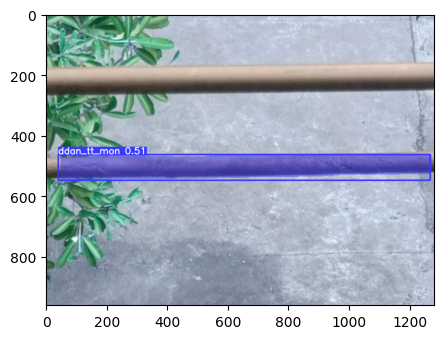

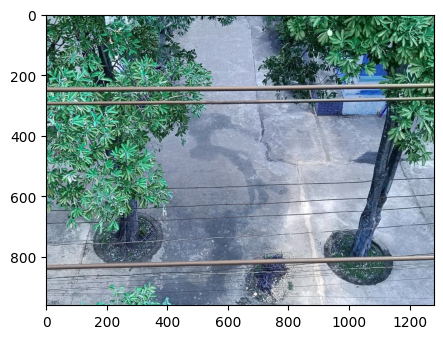

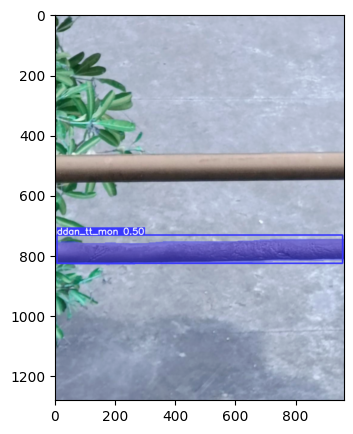

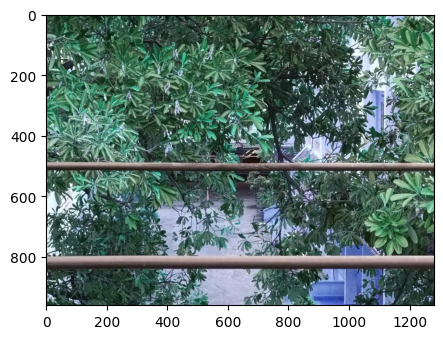

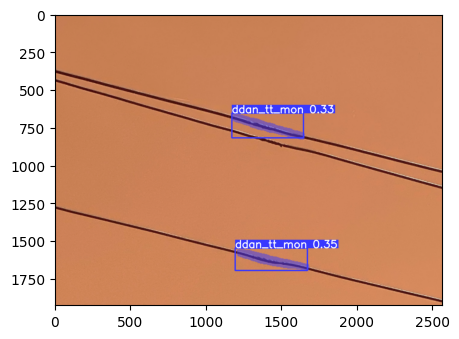

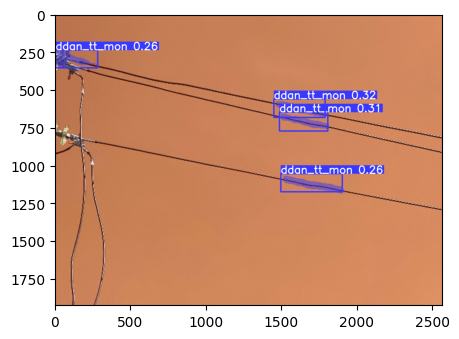

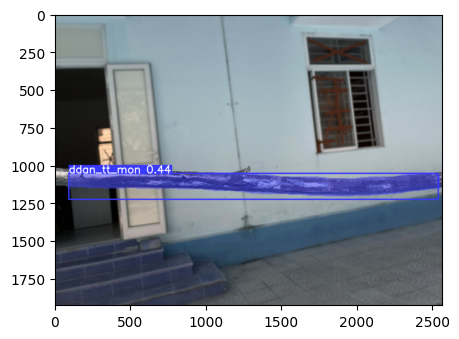

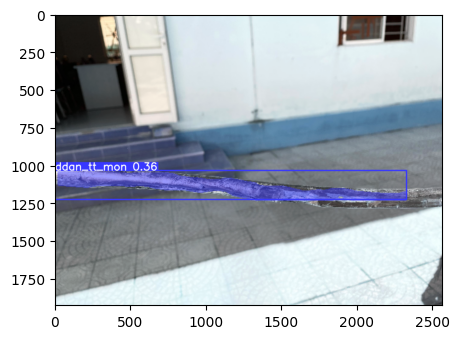

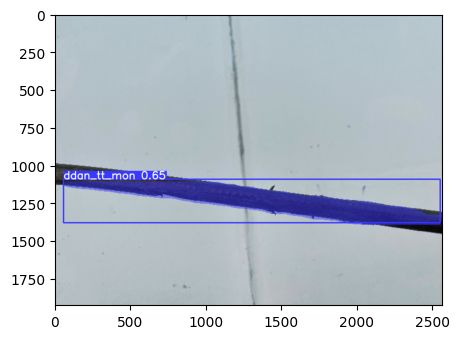

In [14]:
import matplotlib.pyplot as plt

for i in range(len(result)):
    if i > 10:
        plt.figure(figsize=(5,5))
        plt.imshow(result[i].plot())
        plt.show()

In [ ]:
model.tune(data='/kaggle/working/data.yaml', epochs=50, iterations=50, optimizer='AdamW', plots=False, save=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/segment/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/50 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=

100%|██████████| 755k/755k [00:00<00:00, 39.0MB/s]
2024-04-22 06:59:30.201599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 06:59:30.201735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 06:59:30.333634: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 160MB/s]


AMP: checks passed ✅
train: New cache created: /kaggle/working/train/labels.cache


train: Scanning /kaggle/working/train/labels...:   0%|          | 0/68 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
train: Scanning /kaggle/working/train/labels... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<00:00, 846.69it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 628.40it/s]


val: New cache created: /kaggle/working/valid/labels.cache
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.25G      2.486      4.514      4.272      2.355          5        640: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.763       5.11      21.39      2.444         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      3.779       5.86      56.18      3.089         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.12G      3.762      5.802      4.657      3.246          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      3.737      5.184      4.083      3.127         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.12G      3.841       5.53      4.313      3.278         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G      3.906      5.966      4.059      3.338          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.12G      3.783      5.121      3.856      3.153          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      3.747       5.08      3.849      3.242         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.11G      3.668      4.597      3.678       3.08         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.13G       3.47      4.395       3.54      3.058         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.14G      4.002      4.407      3.866      3.358         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.13G      3.586      3.885      3.702      3.115         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.13G      3.469      3.981      3.601      3.012         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.15G      3.416      4.797      3.625      3.072          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.14G      3.421      4.318      3.466      3.035          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.13G      3.758      3.805      3.518      3.183         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.14G      3.619      4.037      3.516       3.11         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.13G      3.407      3.957      3.551      3.081         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50       8.8G      3.492      3.665      3.452      2.937         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.11G        3.6      3.816        3.5      3.094         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G      3.537      3.961       3.44      3.167         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50         9G      3.589      3.815      3.359      3.027         21        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.99G      3.318      4.109       3.47      3.095         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G      3.293      3.953       3.27      2.909         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G      3.174      4.033      3.374      2.899          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50         9G      3.342      3.236      3.381      3.024         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.99G      3.459      3.482      3.437      2.846          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G      3.427      3.789      3.338      3.063          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      3.387       3.65      3.228      2.905         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.01G      3.125      3.869      3.415      2.885          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.99G      3.413       3.63      3.307      2.941         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.11G       3.29      3.558      3.272      2.885         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.15G      3.282      3.868       3.33      2.885         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.01G      3.214      3.246       3.21      2.933         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.98G      3.252      3.309      3.248      2.934         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.11G      3.291      3.386      3.229      2.935         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.15G      3.152      3.387      3.291      2.894          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.01G      3.194      3.256       3.14      2.939         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.99G       3.23      3.305      3.315      2.763          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


  0%|          | 0/5 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.13G      3.345      3.333      3.518      2.779          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      3.372      3.418      3.432      2.721          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.02G      3.157      3.662      3.371       2.73          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50         9G      3.138      3.167      3.425      2.838          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.13G      3.251      3.403      3.356      2.895          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      3.174      3.471      3.238      2.882          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.02G      3.281      3.577      3.331      2.773          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50         9G      3.191      3.272      3.257      2.753          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.14G      3.451      3.899      3.437      3.094          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.16G      3.226      3.536      3.292      2.752          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


                   all         20         24      0.146      0.125     0.0816     0.0183      0.175      0.167     0.0913     0.0353

50 epochs completed in 0.064 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 54.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


                   all         20         24      0.144      0.125     0.0816     0.0183      0.175      0.167     0.0913     0.0353
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.9ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 1/50 iterations complete ✅ (267.21s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.06548 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.14556, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.08159, 'metrics/mAP50-95(B)': 0.01825, 'metrics/precision(M)': 0.17546, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.09128, 'metrics/mAP50-95(M)': 0.0353, 'val/box_loss': 3.09733, 'val/seg_loss': 3.42278, 'val/cls_loss': 3.68745, 'val/dfl_loss': 2.6849, 'fitness': 0.06548}
Tuner: Best fitness model is runs/segment/train
Tuner: Best fitness hyperparameters are printed below.


2024-04-22 07:03:52.246526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:03:52.246582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:03:52.248256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01014, momentum=0.921) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00048), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      2.744      5.206      4.644       2.12         10        640: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.684      5.214      12.63      1.999          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50       9.1G      3.918      7.052      27.95      2.755         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50       9.1G      4.052      6.197      4.488      2.878          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      4.134      5.097       4.42      2.865          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      3.803      5.009      3.893      2.654         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G      3.625      4.716      3.853       2.62         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.11G      3.688      4.249      3.725      2.643          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G       3.38      3.904      3.613       2.55         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.11G       3.44      4.223      3.524      2.537          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.12G      3.387      4.058      3.346      2.525         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G      3.334      3.604      3.344      2.524          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.11G      3.303      3.949      3.465       2.62         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.08G      3.398       3.62      3.361      2.661         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.14G      3.192      3.906      3.547      2.593          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.11G      3.308      3.812      3.241      2.647         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.08G       3.22      6.728      3.352      2.596          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.13G      3.152      4.092      3.451      2.538          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.14G      3.448      3.928      3.309      2.618         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.42G      3.251      3.807       3.45      2.641          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.11G      3.171       3.91      3.322       2.56         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G       3.32      4.028       3.39       2.55         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.03G      3.369      3.997      3.366      2.566         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50         9G      3.394      3.927      3.404      2.623          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G      3.542       4.39      3.449      2.655         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G      3.345      4.065        3.4      2.485          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.21G      3.321      3.972      3.374      2.579         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.14G      3.236      3.955      3.417       2.53         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G      3.248      3.773       3.38       2.52          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.14G      3.332      3.981      3.358      2.513         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.03G      3.273      4.145      3.434      2.476          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.99G      3.245      5.994      3.735      2.613          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.11G      3.279      4.987      3.601       2.49         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.15G      3.239      3.815      3.753      2.528          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.03G      3.185      3.956       3.47      2.528         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.99G      3.302      3.943      3.583      2.594         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.12G      3.138      3.983      3.504        2.5          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.14G      3.354      3.851      3.349       2.55         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.21G      3.152      3.708      3.312      2.393          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.14G      3.133      3.845      3.463      2.448         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


  0%|          | 0/5 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.13G      3.091      3.664      3.502      2.284          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      3.113       3.64      3.457      2.218          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.05G      2.886      4.044      3.433      2.252          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.01G      2.983      3.463      3.319      2.408          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.14G      3.038      3.707       3.33      2.388          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.15G      3.024      3.592      3.262      2.374          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.04G      3.061      3.964      3.322      2.265          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.01G        3.1      3.555      3.265      2.288          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.14G      3.345      4.141      3.521      2.485          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.15G      3.101      3.733      3.236      2.275          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


                   all         20         24     0.0125      0.333     0.0656     0.0159     0.0157      0.417     0.0732      0.017

50 epochs completed in 0.062 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 54.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


                   all         20         24     0.0125      0.333     0.0656     0.0159     0.0157      0.417     0.0732      0.017
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 1.2ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 2/50 iterations complete ✅ (514.92s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.06548 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.14556, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.08159, 'metrics/mAP50-95(B)': 0.01825, 'metrics/precision(M)': 0.17546, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.09128, 'metrics/mAP50-95(M)': 0.0353, 'val/box_loss': 3.09733, 'val/seg_loss': 3.42278, 'val/cls_loss': 3.68745, 'val/dfl_loss': 2.6849, 'fitness': 0.06548}
Tuner: Best fitness model is runs/segment/train
Tuner: Best fitness hyperparameters are printed below.


2024-04-22 07:07:59.884510: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:07:59.884570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:07:59.886187: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.00997, momentum=0.93295) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00048), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      2.063      3.865      4.153      2.748          7        640: 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.89G      2.443      4.331      9.048      3.038         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      3.486      5.325      18.83      4.292         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.11G      3.258      5.878      4.424      4.036         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      3.163      4.402      4.021      3.803          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      3.122      4.201      3.598      3.786          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G      2.962      3.658      3.413      3.684         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.11G      2.958      3.572      3.582      3.717         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      2.849      3.408      3.413      3.582         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       9.1G      2.848      4.084      3.342      3.607         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.12G      2.871      3.501      3.333      3.566         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G      2.707       3.64      3.386       3.62         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      2.785      3.271        3.3      3.564         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.09G      2.783      3.544      3.369      3.756         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.12G      2.703      3.216      3.299      3.474         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.11G      2.872      3.713      3.263      3.651         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50       9.1G      2.735      3.365      3.212      3.585         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.12G      2.619      3.962      3.094      3.576         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.15G      2.674      3.247      3.219      3.519         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.12G      2.577      3.245      3.208      3.586         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.11G      2.694      3.181      3.254      3.668         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G       2.88      2.906      3.274      3.534          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.13G      2.748      3.091      3.163      3.507         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50       9.1G      2.723       3.06      3.045      3.521         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G      2.641      3.225      3.062      3.499         20        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G      2.559      3.072       3.19      3.418          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.13G      2.633      2.908      3.038      3.491         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50       8.8G      2.627      2.991      3.163      3.332          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G      2.527      2.965      3.112      3.403          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      2.644      3.051      3.098      3.356          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.14G      2.565      3.172      3.182      3.388          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       9.1G      2.517       3.06      3.117      3.338          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.11G       2.55      2.703      3.013      3.388         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.13G      2.369       2.92       3.14      3.394         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.13G      2.476      2.965      3.201      3.356          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.85G      2.403       2.95      3.094        3.3         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.11G      2.559      3.314      3.122      3.454          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.14G      2.568      2.959      3.101      3.492          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.13G      2.379      2.735      2.963      3.135         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.12G      2.309      2.646      2.905      3.135         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.13G       2.43      2.815      3.291      3.206          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.15G      2.386      2.943      3.267      3.123          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.14G      2.432      3.296      3.328      3.301          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       9.1G      2.464      2.738      3.181      3.322          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.13G      2.503      2.815      3.134      3.387          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.15G      2.387      2.843      3.138      3.337          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.14G      2.472      2.899      3.052      3.227          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.11G      2.283      2.645      3.052      3.194          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.13G      2.419      3.331       3.25      3.332          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.15G      2.432       2.94      3.071      3.225          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


                   all         20         24     0.0567     0.0833     0.0681     0.0166      0.085      0.125     0.0713     0.0241

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 54.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


                   all         20         24     0.0572     0.0833     0.0681     0.0158     0.0857      0.125     0.0712     0.0246
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.8ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 3/50 iterations complete ✅ (763.28s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.06548 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.14556, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.08159, 'metrics/mAP50-95(B)': 0.01825, 'metrics/precision(M)': 0.17546, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.09128, 'metrics/mAP50-95(M)': 0.0353, 'val/box_loss': 3.09733, 'val/seg_loss': 3.42278, 'val/cls_loss': 3.68745, 'val/dfl_loss': 2.6849, 'fitness': 0.06548}
Tuner: Best fitness model is runs/segment/train
Tuner: Best fitness hyperparameters are printed below.


2024-04-22 07:12:08.261656: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:12:08.261718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:12:08.263259: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01, momentum=0.95376) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00049), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      2.592      5.043      4.677      2.198         11        640: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.774      4.729      17.04      2.213          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      3.928        6.6      18.23      2.942         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.11G      3.625      5.735      4.401      2.888         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      3.598      4.708      4.192      2.883          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.12G      3.397      4.455      3.871      2.821         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G        3.4      4.711      3.757      2.772         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.11G      3.524      3.916       3.71      2.825         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      3.589      4.753      4.046      2.759          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       9.1G      3.362      18.79      3.933      2.795         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.13G      3.256      4.277      3.916      2.741          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.16G      3.392      4.276      3.839        2.7          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      3.374      4.063      3.779      2.808         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50       9.1G      3.387      4.631      3.607      2.757         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.15G      3.351      4.526      3.668      2.697          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G      3.211      4.132      3.691      2.783          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.12G      3.144      4.491      3.587      2.614         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.14G      3.228      4.487      3.692       2.68          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.07G      3.244       3.98      3.668      2.758         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50         9G      3.406      3.853      3.542      2.694         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.12G      3.099       3.41      3.602      2.643          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G      3.149      3.614      3.537      2.667         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.15G       3.35      3.422       3.43      2.657         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.11G      3.323      3.503      3.499      2.645         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G       3.23      4.229      3.593      2.666         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.14G      3.182      3.809      3.486       2.65          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.05G       3.12      3.634      3.475      2.582          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.04G      3.301      3.834      3.468      2.653         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.12G      3.087      3.755      3.524      2.594          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      3.361      3.842      3.504      2.568         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.98G      3.138      3.474      3.402      2.561         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.97G      3.065      3.667      3.415      2.606          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.12G      3.014      3.635      3.381      2.594         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.14G       3.01      3.465      3.337       2.58         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.12G       2.96      3.608      3.401      2.596         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.08G      3.219      3.468      3.388      2.527         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.13G       3.01      3.432      3.372      2.493          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.15G       3.13      3.326      3.418      2.444          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.12G      3.014      3.812      3.379      2.552         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.09G      2.956      3.703      3.387      2.539         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.14G      2.905      3.721       3.58      2.329          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      2.986      3.464      3.475      2.309          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.14G      2.883      3.714      3.483      2.354          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       9.1G      3.007       3.44      3.473      2.528          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.14G      3.099      3.349      3.482      2.548          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      2.928      3.549      3.436      2.467          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.27G      2.793      3.351      3.436      2.333          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.19G      2.899       3.15      3.353      2.327          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.14G      2.861      4.023      3.574      2.435          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.16G      2.857      3.465      3.374      2.262          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


                   all         20         24       0.11      0.125     0.0963     0.0233      0.146      0.167      0.112     0.0369

50 epochs completed in 0.062 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 54.8MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


                   all         20         24       0.11      0.125     0.0963     0.0233      0.146      0.167      0.112      0.037
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.9ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 4/50 iterations complete ✅ (1011.37s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed bel

2024-04-22 07:16:16.575672: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:16:16.575731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:16:16.577308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01019, momentum=0.94955) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.24G      2.463       4.41      4.251      2.386          5        640: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      3.026      4.827      16.25      2.567         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50       9.1G      3.816       5.92      34.46      2.973         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.11G      3.852      6.204      4.679      3.333          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.13G       3.67       5.09      4.183      3.125         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      3.769       4.86      4.016      3.202         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G      3.833      4.299      3.913       3.19          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.11G      3.563      4.143      3.695      3.029          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.13G      3.383      3.777      3.675       2.94         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       9.1G      3.575      4.433       3.66      3.002         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.13G      3.344      3.829       3.52      3.029         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G      3.514      4.671      3.632      3.048         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      3.223      4.817      3.404      2.938         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50       9.1G      3.277      3.873      3.493      2.906         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.14G      3.249      4.228      3.598      2.983          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G      3.335      3.809      3.463      2.902         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.09G      3.141      3.618      3.405      2.793         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.14G      3.174      3.844      3.388      2.885         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.08G      3.027      3.744      3.436      2.916         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.01G      3.124      4.197      3.371      2.778         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.12G      3.201      4.013      3.354      2.813         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G      3.282      3.774      3.292      2.934         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.12G      3.267      3.893      3.328      2.837         21        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.07G      3.112      4.026       3.48       2.94         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.12G      3.124      3.742       3.35      2.806         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G      3.008      3.843      3.359      2.822          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.12G       3.08       3.46      3.348      2.801         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.86G      3.115       3.99      3.464      2.817          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.12G      2.957      3.852      3.421       2.84          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      3.128       3.54      3.248       2.78         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.13G      2.888      3.708      3.332      2.666          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.86G       3.09      3.312       3.28      2.867         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.12G      3.052       3.37      3.382      2.779         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.15G      3.048      4.008      3.347      2.835         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.12G      2.924      3.365      3.208      2.784         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.85G      2.865      3.466      3.288      2.626         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.12G       2.89      3.191      3.239      2.724         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.15G       2.94      3.305       3.18      2.801          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.13G      2.981      3.419      3.121      2.851         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.86G      2.956      3.601      3.328      2.679         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


  0%|          | 0/5 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.14G       2.99      3.372      3.298      2.557          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      3.018       3.33       3.27      2.491          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.14G      2.915      3.484      3.312      2.566          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.87G      2.853      3.139      3.285      2.678          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.14G      2.897      3.472      3.318      2.642          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      3.115      3.294      3.172        2.8          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.14G      3.037      3.396      3.189      2.519          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.87G      2.976      3.145      3.179      2.526          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.15G      3.335      3.834      3.369      2.941          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.16G      3.006      3.342      3.165      2.537          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


                   all         20         24     0.0658     0.0833      0.029     0.0118      0.136      0.208     0.0591     0.0156

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train5/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train5/weights/best.pt, 54.8MB

Validating runs/segment/train5/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


                   all         20         24     0.0658     0.0833     0.0294      0.012      0.132      0.208     0.0592     0.0157
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.8ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 5/50 iterations complete ✅ (1260.08s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed bel

2024-04-22 07:20:25.137415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:20:25.137473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:20:25.139062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01032, momentum=0.95637) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00046), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      1.932      3.821      3.978      2.792          6        640: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.462      4.359      10.67      3.255          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      3.256      5.442      24.15        4.3          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.11G      3.161      5.744      5.707      4.304         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      3.139      4.836      4.696      4.127          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      2.989      3.926      4.334      3.984          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.15G      2.901      4.046      3.689      3.965          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.11G       2.93      3.709      3.704      4.038         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      2.941      3.667      3.602      3.974         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.11G      2.698      3.698      3.359      3.851         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.13G      2.722      3.695      3.445       3.75         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G      2.619      3.423      3.274      3.794         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      2.669      3.204      3.224      3.641         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.12G      2.684      3.229      3.356      3.932         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.13G      2.653      3.172      3.234      3.671         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G      2.694        3.4      3.244      3.785         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.13G      2.725      3.124      3.154      3.743         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.13G      2.561      3.187      3.065      3.619         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.72G      2.552      3.272      3.263      3.648         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.69G      2.532      3.177      3.263      3.678         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.12G      2.466      3.047       3.27      3.634          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.15G      2.648      3.018      3.278      3.579          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.14G      2.567      2.894       3.21      3.565         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.58G      2.543      2.944      3.198      3.607         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G      2.493      3.196      3.276      3.671         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G       2.37      3.001      3.296      3.516          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.11G      2.526      2.832      3.154      3.651         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.93G       2.56      2.856      3.129      3.535          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.12G      2.491      2.915      3.265       3.56          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      2.419      2.994      3.174      3.434          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.12G      2.327      2.641      3.083      3.589         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.09G      2.552      2.831      3.289      3.646          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.12G      2.503      2.658      3.115      3.552         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.14G      2.474      2.813      3.162      3.694         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.12G      2.413      2.677      2.997      3.482         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.08G      2.499      2.947      3.147      3.483         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.12G      2.399      2.726      3.005      3.552          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.15G      2.482      2.921       3.03      3.649          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.12G      2.426      2.676      3.018      3.588         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.08G      2.434      2.699       2.97      3.536         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.14G      2.581      2.679      3.408      3.403          4        640: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      2.517      2.765      3.373      3.278          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.14G      2.449      2.967      3.372      3.325          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       9.1G      2.554      2.823      3.289      3.649          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.14G      2.569       2.76      3.225      3.552          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      2.487      2.917      3.226      3.469          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.13G      2.507      2.836      3.201      3.301          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       9.1G      2.508       2.55      3.082      3.329          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.15G      2.684      3.071      3.227      3.696          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.15G      2.522       2.85      3.161      3.396          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


                   all         20         24     0.0607      0.125     0.0316     0.0055     0.0695      0.143     0.0648     0.0124

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train6/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train6/weights/best.pt, 54.8MB

Validating runs/segment/train6/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


                   all         20         24     0.0607      0.125     0.0321    0.00563     0.0695      0.143     0.0651     0.0125
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.8ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 6/50 iterations complete ✅ (1509.66s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed bel

2024-04-22 07:24:34.838199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:24:34.838261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:24:34.839883: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01017, momentum=0.93295) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00048), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      2.078      3.998      4.021      2.667         12        640: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.523      4.745      14.24      2.993          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      3.256      5.037      30.44      3.802          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.11G      3.133      5.148      3.956      3.794         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      2.972      4.217      3.645       3.61          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      2.881      4.143      3.691      3.521          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.15G       2.95      3.381      3.488      3.619          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.11G      3.027      3.526      3.495      3.623         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.15G      2.957      3.627      3.527      3.556         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.11G      2.779      3.535      3.337      3.378         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.14G      2.757      3.395      3.271      3.332         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G       2.76      3.379      3.306      3.438         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.13G      2.637      3.441      3.309      3.433         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.31G       2.68      3.154        3.3      3.324          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.14G      2.636      3.066      3.266      3.283         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G      2.674      3.119      3.245      3.345         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.32G      2.692      3.001      3.276      3.386         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.14G      2.663      2.938      3.097      3.343         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.62G      2.614      3.261       3.22      3.292         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.55G      2.604      3.036      3.191      3.338         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.12G      2.679      3.196      3.299      3.476          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.15G      2.788      3.013      3.258      3.344          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.11G      2.662      2.985      3.204      3.325         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.09G      2.741      3.006      3.081      3.385         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.12G      2.518      3.071      3.119      3.236         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.14G      2.663      2.923      2.997      3.335         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.49G      2.626      2.745      2.971      3.251         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.45G      2.709      2.914      3.092      3.303         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.12G      2.595      2.948      3.193      3.197          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.14G      2.531      3.012      3.133      3.191          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.49G      2.497      2.803      3.063      3.207         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.45G      2.567      3.146      3.114       3.37         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.12G       2.55      2.957      3.016      3.283         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.14G      2.466      2.701       2.97      3.223         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.49G      2.552      3.112      3.231      3.243          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.45G      2.475      2.523       2.89      3.133         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.12G      2.385      3.161      3.238      3.212          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.14G      2.394      2.774      3.053      3.135         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.49G      2.452      2.783      3.068      3.093          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.45G      2.416       2.93      3.016      3.199         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.14G      2.554      2.784      3.072      3.025          4        640: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      2.509      2.915      3.123      2.889          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50       9.5G       2.61      3.058       3.12      3.076          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.46G       2.48      2.612      3.162      3.195          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.14G      2.597      2.844       3.13      3.233          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      2.629      2.866      3.015       3.14          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.18G      2.563      2.859      3.011      2.905          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.15G      2.505      2.519      3.049      2.878          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.15G      2.636       3.14        3.2      3.193          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.15G      2.409      2.764      3.019      2.791          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


                   all         20         24    0.00318       0.75      0.082     0.0173    0.00212        0.5     0.0871     0.0249

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train7/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train7/weights/best.pt, 54.8MB

Validating runs/segment/train7/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


                   all         20         24    0.00318       0.75     0.0818     0.0173    0.00212        0.5     0.0869     0.0248
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.9ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 7/50 iterations complete ✅ (1759.51s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed bel

2024-04-22 07:28:44.484601: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:28:44.484659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:28:44.486334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.00823, momentum=0.98) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00041), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      2.364      4.255      4.911      2.235          7        640: 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G       2.76      5.325      12.02      2.476         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.12G        3.6       5.96      12.49      3.176          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.12G      3.481      5.724       7.05      3.082         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.16G      3.546      4.566      5.756      2.891          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.12G      3.438      4.569      4.909      2.967          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.15G      3.512      4.371      4.322      3.052         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.12G      3.191      3.885      3.842      2.958         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.15G      3.475      3.888      4.072      3.127          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.12G      3.009      3.618      3.778      2.812         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.14G      3.088      3.735      3.894      2.838         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G      3.009      3.455      3.902      2.962         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.14G      3.157       3.54      3.807       2.82         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.16G      3.112      3.423      3.782       2.86         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.15G      3.046      3.182       3.64      2.789         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.14G      3.005      3.335      3.702      2.706         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.16G      2.928      3.089      3.647       2.68         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.15G      3.087      3.413      3.692      2.711         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.11G      2.977      3.431      3.622       2.72         21        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.71G      2.736      3.465       3.61      2.737         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.13G      2.976      3.233      3.847      2.663         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.15G       2.94      3.346      3.709      2.811         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.07G      3.055      3.293      3.645      2.801         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.09G       3.07      3.422      3.888      2.907         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.12G      3.147      3.577      3.808      2.849         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G      2.958      3.235      3.673      2.792         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.14G      2.982      3.397      3.733      2.773         18        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.61G      2.858      3.289       3.72      2.766         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.13G      2.856      3.666      3.979      2.728          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      2.966      3.526      3.773       2.83          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.13G      2.811       3.61      3.874      2.946          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.92G      2.911      3.172      3.653      2.658         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.12G      2.768      3.319      3.763      2.778         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.16G      2.658      3.161      3.585      2.693          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.08G      2.896      3.374      3.584      2.677         18        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.09G      2.847      2.943      3.699      2.795         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.12G      2.823       3.26      3.561      2.734         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.16G      2.698      2.976      3.557       2.69          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.08G      2.727      3.032      3.641      2.625         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.02G       2.77      3.132      3.586      2.687         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


  0%|          | 0/5 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.15G      2.785      3.135      4.049      2.503          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.17G      2.825      3.251      4.013      2.482          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50       9.1G      2.807      3.586      4.104      2.597          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.11G      2.748      3.149      3.837      2.681          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.15G      2.896      3.265      3.839      2.647          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.17G      2.832      3.298      3.854      2.637          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.09G      2.802      3.109      3.917      2.612          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       9.1G      2.815      2.983      3.738      2.523          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.15G      2.969      4.065      4.126      2.732          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.16G      2.766      3.208      3.876      2.542          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


                   all         20         24    0.00281      0.583    0.00409    0.00148     0.0026      0.208     0.0018    0.00055

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train8/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train8/weights/best.pt, 54.8MB

Validating runs/segment/train8/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


                   all         20         24    0.00281      0.583    0.00315     0.0016    0.00261      0.208     0.0018   0.000563
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.8ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 8/50 iterations complete ✅ (2007.70s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed bel

2024-04-22 07:32:52.701589: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:32:52.701648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:32:52.703309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01, momentum=0.951) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00048), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      2.703      5.057      4.705      2.184          8        640: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.89G      3.183      5.525      7.832      2.249         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      4.318      5.837      50.82      2.856          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.11G      4.205      6.444      4.568      3.048          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      4.136      5.591      4.375      3.038         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      4.162      7.087       4.49      3.057          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.15G       4.12      6.259       4.48      3.023         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.12G      3.985      5.566      4.009        2.8          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      3.989      4.605      3.971      2.874         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.11G      3.659      4.615      3.903      2.754          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.14G        3.9      5.342      3.936      2.859         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G       3.73      5.221      3.742      2.847         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      3.678      4.935      3.949      2.915          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.15G      3.513      4.663      3.839      2.928          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.14G      3.698      5.015      3.732      2.865          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G       3.89      4.837      3.799      2.832         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.15G      3.619      4.679      3.769      2.805          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.14G      3.934      4.593      3.776      2.809         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.39G      3.625      4.922      3.886      2.766         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.02G      3.634      4.468      3.757      2.769         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.11G      3.887      4.678      3.885      2.795         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G       3.55      4.595      3.868      2.795         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.15G      3.331      4.743      3.888      2.611         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.12G       3.71      5.193      3.759      2.676         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G      3.743      4.972      3.946      2.858          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G      3.449      4.998      3.919      2.672          3        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.06G      3.737      7.444      3.903      2.739         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.04G      3.566       5.53      3.874      2.766          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G      3.667      4.821      3.947       2.85          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      3.663      4.723      3.864      2.835          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.07G      3.772      4.875      3.881      2.786         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.03G      3.717      4.646      3.835      2.682          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.12G      3.549       4.81      3.697      2.754         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.15G      3.565      4.374      3.682      2.733          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.07G      3.383       4.51      3.619       2.58          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.04G      3.543      4.365      3.712      2.699          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.12G      3.356      4.451      3.693      2.656         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.15G      3.519       4.81      3.693      2.613         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.06G      3.483      4.802      3.681      2.639         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.04G      3.342      4.221      3.746      2.537          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.14G      3.531      4.485      4.011      2.471          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      3.581       4.44      4.038      2.563          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.08G      3.371      4.634      3.981      2.535          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.05G      3.496      4.493      3.968      2.625          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.14G      3.676      4.085      3.852      2.649          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      3.354      4.363      3.827      2.536          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.08G      3.372      4.305      3.808      2.547          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.05G      3.456      4.164      3.745      2.567          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.14G      3.562      5.322      3.863      2.692          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.16G      3.482      4.488      3.773      2.494          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


                   all         20         24    0.00269      0.542     0.0119    0.00279    0.00248        0.5     0.0121     0.0026

50 epochs completed in 0.062 hours.
Optimizer stripped from runs/segment/train9/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train9/weights/best.pt, 54.8MB

Validating runs/segment/train9/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


                   all         20         24    0.00269      0.542      0.012    0.00281    0.00248        0.5     0.0122    0.00261
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.8ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 9/50 iterations complete ✅ (2255.02s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed bel

2024-04-22 07:36:59.970072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:36:59.970138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:36:59.971668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01033, momentum=0.97148) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.24G      2.474      4.326       3.94      2.369          5        640: 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.89G      2.892      4.915      13.52      2.565         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      4.009      5.916      8.721      3.251         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.11G      3.552      5.106      4.008      3.083          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      3.547      4.545      3.723      3.026         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      3.545       5.57      3.484      3.068          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G      3.587      4.013      3.445      3.091          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.11G       3.34      3.736      3.215       2.95          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      3.248      3.579      3.207      2.983         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.11G      3.395      3.903      3.134      2.958         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.13G      3.419      4.393      3.092      3.039         18        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.14G      3.383      4.705      3.211      2.994         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      3.466      4.144       3.24      3.083         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.12G      3.169       3.71      3.024       2.85          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.16G      3.255      3.788      2.999       2.96         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.13G      3.219       9.09      3.084      2.987          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.12G      3.214      3.556       3.04      2.963         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.16G      3.172      3.884      3.194      2.902          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.95G      3.119       3.58      3.106       2.92         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.88G      3.272      3.623      3.036      2.984         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.11G      3.122      4.853      3.094      2.975          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.15G      3.308      3.835      3.132      2.958          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.21G      3.259      4.737      3.177      2.984         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.16G      3.107      3.659      3.162      3.001         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G      3.217      3.698      3.036      2.953         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.14G      3.011      3.565      3.111      2.928          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.09G      3.018      3.202      3.005      2.825         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.21G      3.124      3.804      3.122      2.867          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G      3.029      5.223      3.142      2.996          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      3.131      3.839      3.231      2.974          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50       9.1G      3.021      3.456      3.042      2.774          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       9.2G      3.022      3.548      3.031      2.845         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.11G      3.052      4.224      3.251      2.893          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.15G      3.086      3.793      2.991      2.908         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.09G      2.943      4.767      2.972      2.819         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50       9.2G      3.005      3.122      2.904      2.845         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.12G      2.956      3.439      2.984      2.753          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.15G      3.105      3.752      2.928      2.715         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.13G       2.89      3.353      2.985      2.792          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.12G      3.011      4.311      3.103      2.827         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.13G      3.212      3.791      3.189      2.794          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      3.262      3.261      3.138      2.728          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.14G      3.093      3.793      3.218      2.837          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.12G      3.096      3.292       3.13      2.906          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.14G      3.202      3.793      3.112      2.871          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      3.108      3.443      3.056      2.833          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.23G      2.987      3.346      3.037      2.652          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.17G      3.168      3.334      3.045      2.748          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.14G      3.234      4.061      3.242      2.841          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.16G      3.083      3.378      2.963      2.661          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


                   all         20         24      0.104      0.167     0.0373    0.00839      0.104      0.167     0.0468     0.0084

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train10/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train10/weights/best.pt, 54.8MB

Validating runs/segment/train10/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


                   all         20         24      0.107      0.167      0.037    0.00834      0.107      0.167     0.0468     0.0084
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.9ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 10/50 iterations complete ✅ (2503.85s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed be

2024-04-22 07:41:08.867850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:41:08.867905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:41:08.869487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01, momentum=0.93919) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.24G      2.611      4.656      4.362      2.352          5        640: 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.889      5.224      20.99      2.423         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      4.033       6.31      34.75      3.239         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.12G      3.782      5.878      4.222      3.106          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      3.875      5.444      4.172      3.083         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.12G      3.805      5.414      4.095      3.148          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G      3.694      5.831      3.701      3.071         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.12G      3.621      5.081      3.745      2.956          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.15G       3.77       4.49      3.821      3.146         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.11G      3.794      4.481      3.765      3.053         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.13G      3.514      4.476      3.788      3.035         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.14G      3.879      4.454      3.746       3.22         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      3.577      3.928      3.619      3.211         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.13G      3.258      4.073      3.705      2.907         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.15G      3.283       4.03      3.622      2.831          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.13G      3.316      3.773      3.575      2.816         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.13G      3.458      4.098      3.647      2.854         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.14G      3.389      3.948      3.617      2.961         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.12G      3.324       4.09       3.59      2.906          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50       8.8G      3.367      3.689      3.556       2.93          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.11G      3.343      3.896      3.513      2.925          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G      3.503      4.075       3.44      2.984         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.32G      3.559      3.913      3.478      3.115         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.28G      3.363      3.856      3.461      3.006         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G      3.297      3.929      3.448      2.919         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G      3.142      4.382      3.415      2.855          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.33G      3.438      3.619      3.404      2.844          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.28G      3.322      3.628      3.376      2.752          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G      3.339      3.871      3.457      2.927         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G      3.285      3.749      3.322      2.832         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.32G      3.206       3.74      3.299      2.836         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.28G      3.272      4.017      3.358      2.829         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.11G      3.287      3.601      3.267      2.808         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.15G      3.029      3.657      3.264      2.677          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.32G      3.152      3.737      3.369      2.753         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.28G      3.179      3.714      3.196      2.834         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.11G      3.125      3.794      3.297      2.816         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.14G      3.168      3.546      3.294      2.733          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.33G      3.296       3.62      3.192      2.707          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.29G      3.147      3.759      3.252      2.815          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.13G      3.402      3.675      3.513      2.779          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.16G      3.312      3.672      3.492      2.665          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.34G      3.204      3.806      3.537      2.734          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       9.3G      3.279      3.405      3.508      2.795          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.13G      3.383      3.441      3.366      2.752          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.16G      3.239      3.463      3.218      2.804          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.33G      2.993      3.633      3.264      2.615          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       9.3G      3.166      3.211      3.237       2.61          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.14G      3.315      4.006      3.359      2.783          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.16G      3.187      3.515      3.203      2.586          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


                   all         20         24     0.0258      0.125     0.0154    0.00339     0.0505      0.208     0.0387     0.0084

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train11/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train11/weights/best.pt, 54.8MB

Validating runs/segment/train11/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


                   all         20         24      0.026      0.125     0.0157    0.00343     0.0505      0.208      0.039    0.00854
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.9ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 11/50 iterations complete ✅ (2752.35s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed be

2024-04-22 07:45:17.332151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:45:17.332215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:45:17.333992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.00944, momentum=0.93068) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00046), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      2.059      3.879      4.127      2.673          7        640: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.489      4.361      13.43      2.978         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.11G      3.132      5.161      10.96      3.665         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50       9.1G      3.193      4.406      4.127      3.744         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.14G      3.245      3.809      3.919      3.776          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.11G      2.953       4.17      3.731      3.589          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.14G      3.029      4.531      3.544      3.751         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50       9.1G      2.925      4.102      3.482       3.68         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      2.934      3.795      3.663      3.732          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       9.1G      2.822      3.763      3.509      3.539         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.13G      2.798      3.367      3.302      3.465         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.14G      2.715      3.905      3.437      3.592         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.12G      2.721      3.638      3.264      3.424         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.11G       2.86      3.714      3.496      3.686         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.12G      2.787      3.248      3.237      3.563         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G      2.699      3.483      3.347      3.468         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.12G      2.653      3.096      3.179      3.467         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.12G       2.63      3.427      3.368      3.506          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.24G      2.586      3.641      3.245      3.471         21        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.16G      2.717       3.23      3.224      3.512         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.11G      2.767      3.483      3.352      3.575         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.14G      2.627      3.487      3.324      3.538         20        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.13G      2.755      3.463      3.171      3.626         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.11G      2.864      3.337      3.333      3.487         18        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50       9.1G      2.705      3.398      3.258       3.42         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.14G      2.645      3.127       3.19      3.405          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.13G      2.657      3.253      3.163      3.383         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50       8.5G      2.622      3.096       3.11      3.398         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G      2.547      2.806      3.168      3.384          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.14G      2.542      3.135      3.224      3.162          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.14G      2.475      3.185       3.16      3.461          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.91G      2.548      2.889      3.093      3.181         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50       9.1G      2.489      3.205      3.138      3.351         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.14G      2.679      3.166      3.038      3.392         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.14G      2.694      3.013      3.166      3.303          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.11G      2.642      2.942      3.189      3.396         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       9.1G      2.421      2.794      3.133      3.199         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.14G      2.597      3.024      3.207      3.378          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.14G      2.461      2.839      3.126      3.245         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.74G      2.521      2.765      3.058      3.046          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.13G      2.589      2.864      3.333      3.138          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.15G      2.582      2.904       3.27      3.048          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.12G      2.404      3.078      3.153      3.016          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.72G      2.453      2.809      3.192      3.204          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.13G      2.586      2.806      3.204      3.232          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.15G      2.445      2.932      3.138      3.121          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.15G      2.512      3.023      3.108      3.055          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.12G      2.464      2.821      3.046      2.956          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.13G      2.563      3.439      3.244      3.233          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.15G      2.449      3.076      3.057      3.002          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


                   all         20         24     0.0141      0.542     0.0767     0.0194     0.0108      0.417      0.116     0.0291

50 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train12/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train12/weights/best.pt, 54.8MB

Validating runs/segment/train12/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


                   all         20         24      0.014      0.542     0.0767     0.0193     0.0108      0.417      0.116     0.0291
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.8ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/segment/tune/tune_scatter_plots.png
Saved runs/segment/tune/tune_fitness.png

Tuner: 12/50 iterations complete ✅ (3003.43s)
Tuner: Results saved to runs/segment/tune
Tuner: Best fitness=0.07505 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.10977, 'metrics/recall(B)': 0.125, 'metrics/mAP50(B)': 0.09627, 'metrics/mAP50-95(B)': 0.02329, 'metrics/precision(M)': 0.14636, 'metrics/recall(M)': 0.16667, 'metrics/mAP50(M)': 0.11232, 'metrics/mAP50-95(M)': 0.03692, 'val/box_loss': 2.84287, 'val/seg_loss': 3.64846, 'val/cls_loss': 3.84721, 'val/dfl_loss': 2.35375, 'fitness': 0.07505}
Tuner: Best fitness model is runs/segment/train4
Tuner: Best fitness hyperparameters are printed be

2024-04-22 07:49:28.739864: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:49:28.739930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:49:28.741783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01182, momentum=0.95376) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00049), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train13
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.24G      2.634      4.657       5.61       2.24          5        640: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.9G      2.632      5.428      32.77      2.121         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.12G      3.588      7.126      75.37      2.681         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.13G      3.779      6.088      5.614      3.027          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.15G      3.788      5.549      5.112      2.944         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.13G      3.704      5.368      5.164      2.863         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.15G      3.801      4.543      4.985      2.905          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.13G      3.574       4.94      4.788       2.81          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.15G      3.685      4.408       4.76      2.851         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.12G      3.669      4.515      4.573      2.839         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.14G      3.486       4.17      4.415        2.8         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.16G      3.686       4.14      4.679      2.856         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.14G      3.301      3.798      4.437      2.701         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.16G      3.443      4.032      4.649      2.719         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


In [4]:
results = model.train(data='/kaggle/working/data.yaml', epochs=100, imgsz=640, 
                      cfg='/kaggle/input/fiber-installation/best_hyperparameters.yaml')


Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]
2024-04-23 01:34:29,380	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-23 01:34:30,596	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-23 01:34:32.852459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 01:34:32.852554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 01:34:32.980165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 126MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels...:   0%|          | 0/68 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
train: Scanning /kaggle/working/train/labels... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<00:00, 939.02it/s]

train: New cache created: /kaggle/working/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 864.41it/s]

val: New cache created: /kaggle/working/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.95376' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.00049), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.24G      2.592      5.043      4.677      2.198         11        640: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         20         24     0.0339     0.0417    0.00682    0.00624      0.105     0.0833      0.017     0.0102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       8.9G      2.267      3.653      4.684       1.97          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20         24     0.0669      0.167     0.0177    0.00438     0.0839      0.208     0.0351    0.00872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       9.1G      2.492      3.267      3.737      2.014         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         20         24     0.0869      0.167     0.0268     0.0101      0.098     0.0833     0.0261     0.0147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.09G      2.393      3.186      3.666      1.956         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         24     0.0185      0.208    0.00808    0.00381     0.0221       0.25    0.00823    0.00509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.16G      2.114      2.536      3.267      1.869          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         20         24    0.00647      0.167    0.00432    0.00112    0.00971       0.25    0.00412    0.00159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.12G      2.083      2.921       2.96       1.77         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         20         24     0.0104      0.208    0.00658    0.00239     0.0125       0.25    0.00496    0.00222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.15G      2.079      2.676      2.865      1.815         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         20         24     0.0367       0.25     0.0216    0.00584     0.0551      0.375     0.0457    0.00975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       9.1G      2.309       2.52      2.728      1.905         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         20         24      0.011       0.25    0.00668    0.00175     0.0137       0.25    0.00743    0.00195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.14G      2.381      2.682      2.891      1.984          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         20         24    0.00682       0.25    0.00311   0.000912    0.00525      0.167    0.00144   0.000326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.11G      2.297      2.795      2.651      1.981         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20         24    0.00186      0.125    0.00111   0.000411   0.000384     0.0417    0.00019   3.76e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.14G      2.533       3.01      3.066      2.133          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         20         24   0.000674      0.167   0.000497   0.000192          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.16G      2.575      2.724      2.846      2.182          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         20         24   0.000824      0.125   0.000927   0.000332          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.12G      2.382      3.105      2.801      2.095         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         20         24   0.000479     0.0833   0.000202   6.21e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.14G      2.345      2.739      2.727      2.114         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         20         24   0.000194     0.0417   9.96e-05   2.99e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.14G      2.385      2.726      2.926      2.046          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         20         24   0.000344     0.0833     0.0002   4.88e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.11G      2.495      3.184      2.905      2.168          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         20         24   0.000667      0.167   0.000635   0.000158          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.13G      2.624      2.648      2.772      2.104         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24   0.000176     0.0417   0.000108   1.08e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.15G      2.499      3.099      3.026      2.019          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         24   0.000167     0.0417    8.7e-05   2.61e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.41G      2.568      2.885      2.942      2.239         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         24   0.000167     0.0417    8.7e-05   2.61e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.86G      2.584       2.58      2.774      2.146         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24   0.000339     0.0417   9.64e-05   4.82e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.11G      2.611        2.6       2.86      2.149          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         24   0.000653     0.0833   0.000224   8.84e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.13G      2.599      2.617      2.963      2.126         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         20         24     0.0025     0.0417    0.00044   0.000104          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.25G      2.416      2.587      2.721      1.919         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24     0.0017       0.25    0.00122    0.00023   0.000928      0.125    0.00034    6.4e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.07G      2.486      2.937      2.884       1.98         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         20         24   0.000457     0.0417   0.000297   5.71e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.11G      2.602      2.963      3.026      2.167         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         20         24   0.000355     0.0833   0.000187    5.6e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.14G      2.525      2.737      2.933      2.116          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         20         24    0.00112     0.0833   0.000462   0.000111          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.02G      2.467      2.563      2.834      2.102          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20         24   0.000333     0.0833   0.000194   4.73e-05   0.000237     0.0417   0.000106   1.06e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.71G      2.554      2.669      2.959      2.167         15        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         20         24   0.000843      0.167   0.000453   0.000169          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.11G      2.463      2.504      2.747       2.09          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20         24   0.000282     0.0417   0.000119   2.39e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.15G      2.579      2.723      2.898      2.131         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         20         24   0.000748     0.0833    0.00152   0.000776   0.000374     0.0417   0.000375    0.00015



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.14G      2.416      2.428      2.781      2.026         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         20         24   0.000569      0.125   0.000603   0.000229   0.000515     0.0833     0.0114    0.00228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.07G      2.547      3.061      2.922      2.194          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         20         24    0.00168      0.292    0.00121   0.000257   0.000722      0.125   0.000331   0.000107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       9.1G       2.29      2.678      2.796      1.998         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         24    0.00199       0.25    0.00115   0.000479    0.00165      0.208   0.000711   0.000318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.14G      2.379      2.639      2.718      2.026         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         20         24     0.0024       0.25    0.00151   0.000457    0.00209      0.208   0.000814   0.000409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.12G      2.303      2.575      2.694      1.968         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         20         24    0.00744      0.292     0.0041   0.000985    0.00528      0.208    0.00193   0.000594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.28G      2.413      2.645      2.719      1.961         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         20         24     0.0401      0.208     0.0187    0.00462     0.0401      0.208      0.018    0.00429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.12G      2.269      2.344       2.57      1.887          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         20         24     0.0394      0.125     0.0163    0.00403     0.0526      0.167     0.0167    0.00402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.15G      2.335      2.425      2.591      1.937          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         20         24     0.0215      0.125      0.011    0.00303     0.0288      0.167     0.0126    0.00331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.01G      2.391      2.738      2.652      1.989         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         24    0.00918      0.333    0.00473    0.00143     0.0118       0.25    0.00532     0.0014



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.93G      2.447      2.624      2.686      2.081         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         20         24     0.0562      0.167     0.0183     0.0051     0.0565      0.167      0.025    0.00697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.11G      2.487      3.051      2.904      2.048         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         20         24     0.0865      0.167     0.0252    0.00808       0.13      0.208     0.0496     0.0145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.16G       2.28      2.518      2.784      2.004          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         20         24      0.154       0.25     0.0871      0.019       0.18      0.292      0.103     0.0293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.02G      2.328      2.891      2.862      2.018          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         20         24     0.0773      0.208     0.0538     0.0177       0.14       0.25      0.116     0.0345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       9.1G      2.304      2.603      2.655      1.875          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         20         24      0.186      0.208      0.123      0.038      0.148      0.167      0.119     0.0344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.11G      2.246      2.471      2.585      1.921         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         20         24      0.119      0.167     0.0921      0.022      0.119      0.167     0.0952      0.024



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.13G      2.277      2.422      2.668      2.023          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         20         24      0.174      0.167     0.0862     0.0208      0.174      0.167     0.0865     0.0234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.14G      2.224      2.738      2.907      2.018          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         20         24      0.109      0.167      0.075     0.0187       0.11      0.208     0.0798     0.0176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.11G      2.312      2.561      2.793      1.936          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         20         24     0.0583      0.208     0.0688     0.0116     0.0894       0.25     0.0793     0.0151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       9.1G       2.24      2.314      2.649       2.01          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         20         24     0.0602      0.167     0.0782     0.0161      0.115      0.167     0.0897     0.0203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.16G      2.161      2.361      2.618      2.019          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         20         24      0.106      0.333      0.102     0.0249      0.133      0.292       0.11     0.0281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       9.2G       2.15      2.483      2.561       1.93         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         20         24      0.196      0.125      0.112     0.0285      0.132      0.333      0.116     0.0418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.25G      2.283       2.74      2.598      1.927         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         24       0.14     0.0833     0.0871     0.0239     0.0937       0.25     0.0955     0.0318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       9.1G      2.146      2.294      2.471      1.901         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         24     0.0983      0.292      0.101     0.0284      0.171      0.208      0.119      0.036



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.13G      2.047      2.104      2.441      1.939          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         24     0.0947      0.458      0.106      0.034      0.163       0.25      0.121     0.0442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.18G      2.158       2.22      2.329      1.865          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24     0.0927      0.375      0.102     0.0332      0.117      0.458      0.115     0.0426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.03G      2.082      2.169      2.288      1.896         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         24        0.1      0.208     0.0938     0.0285      0.123       0.25      0.108     0.0409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.09G      2.186      2.558      2.474      1.949         19        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         24      0.123      0.167     0.0992     0.0315      0.223      0.167      0.116     0.0487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.16G      2.154      2.075      2.386       1.85          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24      0.285      0.167      0.124     0.0411      0.285      0.167      0.144     0.0669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.08G      2.147      2.344      2.438      1.891         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24      0.228      0.246      0.139     0.0424      0.224      0.333      0.157     0.0754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.08G      2.144      2.562      2.458      1.869         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24       0.21      0.292      0.156     0.0506       0.35      0.333      0.256      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100       9.1G      2.097      2.179      2.412      1.877          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         20         24      0.273       0.25      0.181      0.051      0.359      0.417      0.243      0.089



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.14G      1.978      2.145      2.332      1.822          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         20         24      0.381      0.167      0.176     0.0533      0.234      0.417      0.216     0.0732



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.15G      2.015      2.222      2.201      1.785          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         20         24      0.324      0.167      0.143     0.0435      0.162      0.375      0.181     0.0618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.15G      1.916      2.393      2.126      1.768          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24      0.136       0.25      0.147     0.0362      0.232      0.333      0.187     0.0611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.11G      2.154      2.341      2.306      1.799         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         20         24      0.182       0.25      0.132      0.035        0.3      0.333      0.202     0.0708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.16G       1.98      2.008      2.131      1.706          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24      0.347      0.375      0.205     0.0606      0.347      0.375      0.215     0.0869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.12G      2.039      2.269      2.302      1.896          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         20         24      0.412      0.375      0.196     0.0602      0.454      0.416      0.212     0.0862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.58G       1.97      2.242      2.379      1.789         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24      0.272        0.5      0.177      0.052        0.3      0.499      0.223     0.0798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.11G      2.025      2.485      2.331      1.734         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24      0.272      0.342      0.188      0.057      0.249      0.318      0.178      0.066



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.13G      1.807      2.127      2.101      1.723          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24      0.322      0.416      0.215     0.0559      0.264      0.375      0.207     0.0693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.17G       1.85      2.074      2.114      1.687         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24       0.39      0.375      0.226     0.0567       0.39      0.375      0.219     0.0866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.14G      1.822      2.118      2.147      1.729         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         24      0.422      0.375      0.268     0.0635      0.439      0.375      0.283      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       9.1G      1.887      2.336      2.237      1.707          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         24      0.402      0.375      0.248      0.077      0.439      0.417      0.309      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.14G      1.885      2.031      2.031       1.69         16        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24      0.431      0.417      0.275     0.0926      0.462      0.458      0.324      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.06G      1.791      2.002      2.089      1.657         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         20         24       0.36      0.422      0.268     0.0921      0.429      0.501      0.408      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.97G      1.947      2.137      2.282      1.693          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         24       0.39      0.454      0.308     0.0947      0.407        0.5      0.364      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.11G      1.892      2.117      2.156      1.746         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         20         24      0.362      0.458      0.279      0.109      0.373      0.472      0.388      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.15G      1.801      2.011      2.166      1.627          8        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         24      0.418      0.479      0.281      0.109      0.432      0.445      0.326      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.11G      1.839      2.117      1.974      1.641         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         20         24      0.402      0.392      0.242      0.102      0.403      0.375      0.275      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.48G      1.941      2.245      2.023      1.782          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         20         24      0.327      0.333      0.213     0.0817      0.327      0.333      0.269      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.12G      1.885      2.109      2.114       1.78          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         20         24      0.296      0.333      0.202     0.0732      0.362      0.375      0.281      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.15G      1.712      1.874      1.917      1.663          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         20         24      0.293      0.345      0.203     0.0819      0.324      0.375      0.293      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       9.1G        1.8      1.864      1.803      1.633         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         20         24       0.33      0.375      0.241     0.0836      0.348      0.375       0.34      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.11G      1.802      2.244      1.932      1.663          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24      0.367      0.375      0.244     0.0921      0.458      0.458      0.339      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       9.1G      1.745      1.956      1.867      1.663          9        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         20         24      0.289      0.458      0.221      0.094      0.557      0.417      0.362      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.15G      1.802      1.935      2.045      1.631         11        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24      0.297      0.417      0.201     0.0927      0.495      0.458      0.356      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.15G      1.829      2.006      1.879      1.683         14        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24      0.304      0.417      0.217     0.0968      0.477      0.458      0.377      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       9.3G      1.683      2.036      1.757       1.58          7        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         20         24      0.378      0.458      0.254      0.111      0.456      0.542      0.369      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100       9.1G      1.765       1.95      1.851      1.605         12        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         24      0.351      0.458      0.291       0.11      0.377      0.458      0.331      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.15G      1.746      1.738      1.827      1.571         10        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         20         24      0.326      0.417      0.316      0.134      0.364      0.458       0.36      0.171


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.11G      1.727      1.642       2.11      1.624          4        640: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         20         24      0.287      0.417      0.309      0.133      0.323      0.458      0.348      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.15G      1.817      1.912      2.027      1.719          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         24      0.632       0.25       0.32      0.138      0.348      0.458      0.361      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.14G      1.849      1.947      2.069      1.832          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         20         24      0.753       0.25      0.326      0.143      0.379        0.5      0.367      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.14G      1.868      1.864      1.972      1.756          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24      0.857      0.249      0.321      0.144       0.37        0.5      0.373      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.12G      1.756      1.614      1.851      1.725          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         24      0.779      0.208      0.305      0.142      0.384        0.5       0.36      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.85G      1.643       1.59      1.634      1.653          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         20         24      0.425        0.5      0.362      0.145      0.421        0.5      0.376      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.13G      1.736      1.866      1.868      1.686          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         20         24      0.497        0.5      0.375      0.137      0.497        0.5      0.382      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.15G       1.84      1.883      1.929      1.642          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         20         24      0.583        0.5      0.391      0.144      0.583        0.5      0.391      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.13G      1.831      2.228      1.958      1.718          4        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         24      0.625      0.487      0.411      0.144      0.625      0.487      0.403      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.41G       1.67      1.795      1.684      1.641          5        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         24      0.663      0.458      0.427      0.149      0.663      0.458      0.418       0.19



100 epochs completed in 0.166 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 54.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


                   all         20         24      0.663      0.458      0.427      0.149      0.663      0.458      0.418       0.19
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/train
